Question 8 Using the data from Question 5, write code the analyze the data and answer the following questions 
Note 
1. Draw plots to demonstrate the analysis for the following questions and better visualizations 
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019 
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
link = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'
response=requests.get(link)
data=response.json()
df=pd.DataFrame(data['_embedded']['episodes'])
df

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,{'average': 7.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard suspects that someone is sabotaging...,{'self': {'href': 'https://api.tvmaze.com/epis...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,{'average': 7.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard continues to investigate Dolores' s...,{'self': {'href': 'https://api.tvmaze.com/epis...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,{'average': 7.9},{'medium': 'https://static.tvmaze.com/uploads/...,<p>While Dolores joins William and Logan on th...,{'self': {'href': 'https://api.tvmaze.com/epis...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Dolores takes the first step on her path of...,{'self': {'href': 'https://api.tvmaze.com/epis...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,21:00,2016-11-07T02:00:00+00:00,60,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,"<p>While Maeve convinces Felix to show her ""up...",{'self': {'href': 'https://api.tvmaze.com/epis...
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,2016-11-14T02:00:00+00:00,60,{'average': 8.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>While William and Dolores travel to the unc...,{'self': {'href': 'https://api.tvmaze.com/epis...
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,21:00,2016-11-21T02:00:00+00:00,60,{'average': 7.9},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard tries to cope with what he did unde...,{'self': {'href': 'https://api.tvmaze.com/epis...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,2016-11-28T02:00:00+00:00,60,{'average': 8.5},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard forces Robert to take him back into...,{'self': {'href': 'https://api.tvmaze.com/epis...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,2016-12-05T02:00:00+00:00,90,{'average': 8.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Delores finds out the truth about William's...,{'self': {'href': 'https://api.tvmaze.com/epis...


In [5]:
# Converting datatype of rating to float
df['rating']=df['rating'].apply(lambda x:list(x.values())[0])
# Converting airdate, airtime and summary to required format
df['airdate']=pd.to_datetime(df['airdate'])
df['airtime']=pd.to_datetime(df['airtime']).dt.strftime('%I:%M')
df['summary'] = df['summary'].str.replace(r'<[^<>]*>', '', regex=True)
df.drop(columns=['id','url','image','_links','type'],inplace=True)

In [6]:
df

,name,season,number,airdate,airtime,airstamp,runtime,rating,summary
0,The Original,1,1,2016-10-02,09:00,2016-10-03T01:00:00+00:00,68,8.0,A woman named Dolores is a free spirit in the ...
1,Chestnut,1,2,2016-10-09,09:00,2016-10-10T01:00:00+00:00,60,7.7,Bernard suspects that someone is sabotaging th...
2,The Stray,1,3,2016-10-16,09:00,2016-10-17T01:00:00+00:00,60,7.6,Bernard continues to investigate Dolores' supp...
3,Dissonance Theory,1,4,2016-10-23,09:00,2016-10-24T01:00:00+00:00,60,7.9,While Dolores joins William and Logan on their...
4,Contrapasso,1,5,2016-10-30,09:00,2016-10-31T01:00:00+00:00,60,8.0,Dolores takes the first step on her path of di...
5,The Adversary,1,6,2016-11-06,09:00,2016-11-07T02:00:00+00:00,60,8.0,"While Maeve convinces Felix to show her ""upsta..."
6,Trompe L'Oeil,1,7,2016-11-13,09:00,2016-11-14T02:00:00+00:00,60,8.6,While William and Dolores travel to the unclai...
7,Trace Decay,1,8,2016-11-20,09:00,2016-11-21T02:00:00+00:00,60,7.9,Bernard tries to cope with what he did under R...
8,The Well-Tempered Clavier,1,9,2016-11-27,09:00,2016-11-28T02:00:00+00:00,60,8.5,Bernard forces Robert to take him back into hi...
9,The Bicameral Mind,1,10,2016-12-04,09:00,2016-12-05T02:00:00+00:00,90,8.7,Delores finds out the truth about William's fa...


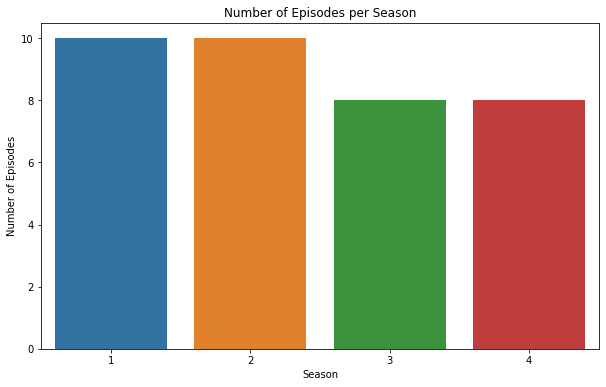

In [57]:
# to check no. of episodes in each season 
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=df)
plt.xlabel('Season')
plt.ylabel('Number of Episodes')
plt.title('Number of Episodes per Season')
plt.show()


### Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

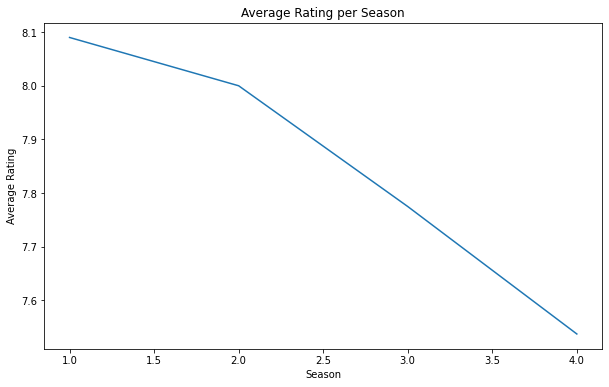

season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: rating, dtype: float64

In [8]:
season_ratings = df.groupby('season')['rating'].mean()

# Plotting the ratings for each season
plt.figure(figsize=(10, 6))
sns.lineplot(x=season_ratings.index, y=season_ratings.values)
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Rating per Season')
plt.show()
season_ratings

### Get all the episode names, whose average rating is more than 8 for every season

In [16]:
highly_rated_episodes = df.groupby(['season', 'name'])['rating'].mean().reset_index()
highly_rated_episodes = highly_rated_episodes[highly_rated_episodes['rating'] > 8]
highly_rated_episodes = highly_rated_episodes['name'].unique()
list(highly_rated_episodes)

['The Bicameral Mind',
 'The Well-Tempered Clavier',
 "Trompe L'Oeil",
 'Kiksuya',
 'The Passenger',
 'Vanishing Point']

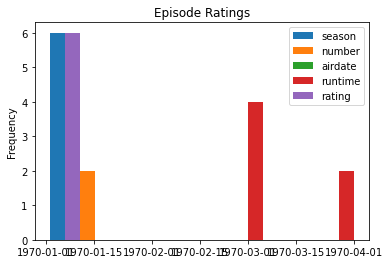

In [50]:
df[df['rating']>8].plot(kind='hist', bins=20, xlabel='Rating', ylabel='Count', title='Episode Ratings')
plt.show()

### Get all the episode names that aired before May 2019 

In [20]:
episodes_may19 = df[df['airdate'] < '2019-05-01']['name'].unique()
for i in episodes_may19:
    print(i)

The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger


### Get the episode name from each season with the highest and lowest rating

In [37]:
lowest_episodes = df.groupby('season').apply(lambda x: x.loc[x['rating'].idxmin()]['name']) 
highest_episodes = df.groupby('season').apply(lambda x: x.loc[x['rating'].idxmax()]['name'])
lowest_episodes.columns = ['Season', 'Episodes']
print("lowest_episodes: " , lowest_episodes, "\n")
print("highest_episodes: " , highest_episodes)

lowest_episodes:  season
1       The Stray
2    Akane No Mai
3     Decoherence
4    The Auguries
dtype: object 

highest_episodes:  season
1    The Bicameral Mind
2               Kiksuya
3          Parce Domine
4              Zhuangzi
dtype: object


### Get the summary for the most popular ( ratings ) episode in every season

In [40]:
popular_episodes = df.groupby('season').apply(lambda x: x.loc[x['rating'].idxmax()])
popular_episodes = popular_episodes[[ 'name', 'summary']]
popular_episodes

,name,summary
season,,
1,The Bicameral Mind,Delores finds out the truth about William's fa...
2,Kiksuya,Another of Westworld's Host revolutionaries is...
3,Parce Domine,"If you're stuck in a loop, try walking in a st..."
4,Zhuangzi,God is bored.
